In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Load datasets

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/user/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


In [3]:
!ls '/home/user/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1'

spam_ham_dataset.csv


In [4]:
df = pd.read_csv('/home/user/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1/spam_ham_dataset.csv')

In [5]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
num_row, num_col = df.shape
print(num_row, num_col)

5171 4


# Data Cleaning and preprocessing

In [7]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
print(df.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [10]:
df = df.drop(columns = {'Unnamed: 0', 'label'})

In [11]:
print(df.isna().sum(), df.duplicated().sum())

text         0
label_num    0
dtype: int64 178


# Split data into train and test data

In [12]:
df = df.sample(frac=1, random_state=42) # suffle data

In [13]:
df.head()

,text,label_num
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ...",0
1988,Subject: online pharxmacy 80 % off all meds\r\...,1
1235,Subject: re : nom / actual volume for april 17...,0
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...,0
4903,Subject: re : coastal oil & gas corporation\r\...,0


In [14]:
df = df.reset_index(drop=True)

In [15]:
df.head()

,text,label_num
0,"Subject: hpl nom for march 30 , 2001\r\n( see ...",0
1,Subject: online pharxmacy 80 % off all meds\r\...,1
2,Subject: re : nom / actual volume for april 17...,0
3,Subject: re : meter 8740 dec 99\r\nrobert and ...,0
4,Subject: re : coastal oil & gas corporation\r\...,0


In [16]:
X = df['text'].rename('Email_text')
Y = df['label_num'].rename('target')

In [17]:
n = round(num_row*0.8)
print(n)

4137


In [18]:
X_train, Y_train = X[0:n], Y[0:n]
X_test, Y_test = X[n:], Y[n:]

In [19]:
X_train.tail()

4132    Subject: harassment avoidance - clarification\...
4133    Subject: lima doubtful eerily cumbersome boeot...
4134    Subject: this is the book my friend was talkin...
4135    Subject: business proposal .\r\nfrom : alhaji ...
4136    Subject: re : cira\r\nyael\r\nhastala vista ,\...
Name: Email_text, dtype: object

In [20]:
X_test.head()

4137    Subject: hl & p volumes 6 / 00\r\ndisregard th...
4138    Subject: hpl nom for july 28 , 2000 - - one da...
4139    Subject: coral on exxonkaty 6 / 01\r\ndarren :...
4140    Subject: italian crafted rolex from $ 75 to $ ...
4141    Subject: cdnow order confirmation\r\ndear dare...
Name: Email_text, dtype: object

In [21]:
print(len(X_train), len(X_test))

4137 1034


# Extract Features

In [22]:
cv = CountVectorizer()

In [23]:
features_train = cv.fit_transform(X_train)

In [24]:
features_test = cv.transform(X_test)

# Modeling

In [25]:
model = SVC()

In [26]:
model.fit(features_train, Y_train)

SVC()

# Test Accuracy

In [27]:
print('Accuracy of our model:', model.score(features_test, Y_test))

Accuracy of our model: 0.9642166344294004


# Optimization

In [28]:
tuned_parameters = {'kernel': ['linear', 'rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]}
best_model = GridSearchCV(SVC(), tuned_parameters)

In [32]:
best_model.fit(features_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [33]:
best_model.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

# Test Accuracy of Optimized Model

In [34]:
print('Accuracy of Optimized model:', best_model.score(features_test, Y_test))

Accuracy of Optimized model: 0.9748549323017408


# Conclusion
    Accuracy increased after applying GridSearchCV from 0.9613152804642167 to 0.9709864603481625

# Confusion Matric

In [35]:
y_predict = best_model.predict(features_test)

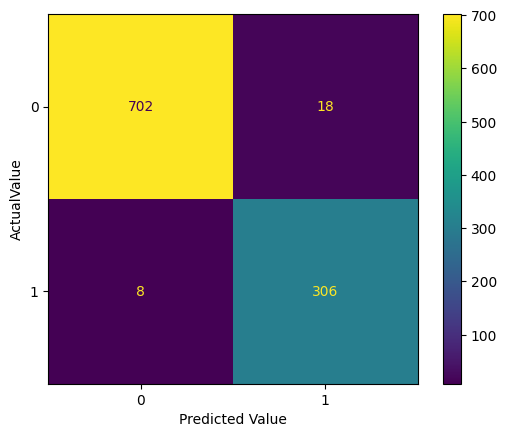

In [36]:
cm = confusion_matrix(Y_test, y_predict)
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel('Predicted Value')
plt.ylabel('ActualValue')
plt.show()